# [linmix_kelly_2007_linear_fit](https://linmix.readthedocs.io/en/latest/example.html)



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import linmix
np.random.seed(2)

$Pr(ξ)∝e^ξ(1+e^{2.75ξ})^{-1}$

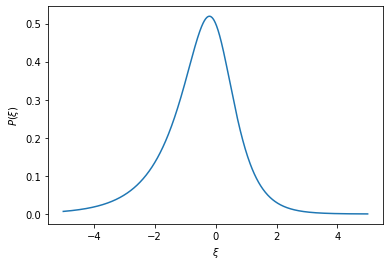

In [2]:
def pxi(xi):
    return np.exp(xi) * (1.0 + np.exp(2.75*xi))**(-1)
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(-5,5, 0.01)
ax.plot(x, pxi(x))
ax.set_xlabel(r"$\xi$")
ax.set_ylabel(r"$P(\xi)$")
plt.show()

In [3]:
def rejection_sample(p, pmax, prop, size):
    out=[]
    for s in range(size):
        x = prop()
        px = p(x)
        pu = np.random.uniform(low=0.0, high=pmax)
        while px < pu:
            x = prop()
            px = p(x)
            pu = np.random.uniform(low=0.0, high=pmax)
        out.append(x)
    return np.array(out)

pmax = 0.55 # max p(xi) determined by eye
prop = lambda : np.random.uniform(low=-10, high=10) # truncating range to (-10, 10)
xi = rejection_sample(pxi, pmax, prop, size=100)

In [4]:
xi

array([-1.28010196, -1.59264396,  0.1049218 , -1.43755345, -0.64425031,
        0.1047344 ,  0.8841632 , -1.87449914, -2.86751438,  0.08000879,
       -2.41578866,  1.65369777, -0.05852403, -3.73482943, -0.57180285,
       -1.03970567,  0.15234973,  0.02432903, -5.62358427, -1.298327  ,
       -0.7652219 ,  0.72686946,  0.53276848, -0.21397424,  0.06013547,
       -2.84963535, -1.70663486,  0.46338652,  1.53419321,  0.63336784,
       -1.52702127, -1.07430065,  0.12509671, -2.05179341, -0.09475675,
       -0.54263176, -0.87535927, -1.50327529, -1.14797808, -1.15429889,
       -1.14712972, -0.61464434,  0.60937709, -0.41983491, -0.36142214,
        0.06042822, -1.0051572 , -0.06224005, -0.81017607, -0.69117171,
       -1.6046208 , -1.28506508, -1.32954042,  2.6462184 , -1.88531467,
       -3.11629867, -1.00522111, -0.96626608, -3.49463775,  1.01765725,
       -1.18610751, -2.01635565,  0.77618097, -0.10157578, -0.06898249,
        0.49900756,  0.72431084,  1.88634017, -0.14865598, -0.97

ax.hist?

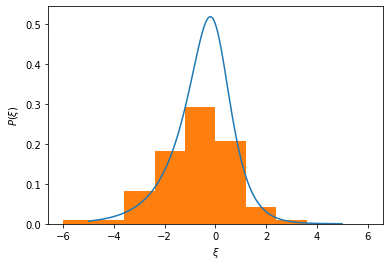

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(-5,5, 0.01)
ax.plot(x, pxi(x))
ax.hist(xi, 10, range=(-6,6),density=True)#, normed=True
ax.set_xlabel(r"$\xi$")
ax.set_ylabel(r"$P(\xi)$")
plt.show()

In [6]:
alpha = 1.0
beta = 0.5
sigsqr = 0.75**2
epsilon = np.random.normal(loc=0, scale=np.sqrt(sigsqr), size=len(xi))
eta = alpha + beta*xi + epsilon


tau = np.std(xi)
sigma = np.sqrt(sigsqr)
t = 0.4 * tau
s = 0.5 * sigma
xsig = 5*t**2 / np.random.chisquare(5, size=len(xi))
ysig = 5*s**2 / np.random.chisquare(5, size=len(eta))
x = np.random.normal(loc=xi, scale=xsig)
y = np.random.normal(loc=eta, scale=ysig)

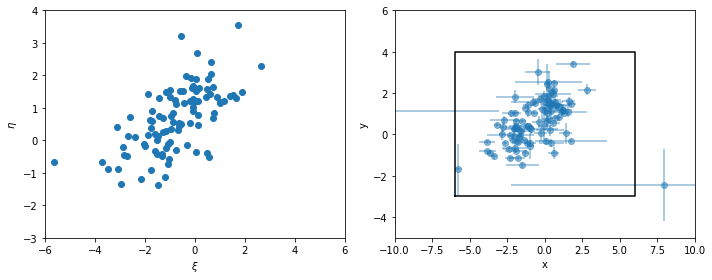

In [7]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax.scatter(xi, eta)
ax.set_xlabel(r'$\xi$')
ax.set_ylabel(r'$\eta$')
ax.set_xlim(-6,6)
ax.set_ylim(-3,4)
ax = fig.add_subplot(122)
ax.scatter(x, y, alpha=0.5)
ax.errorbar(x, y, xerr=xsig, yerr=ysig, ls=' ', alpha=0.5)
ax.set_xlabel(r'x')
ax.set_ylabel(r'y')
ax.set_xlim(-10,10)
ax.set_ylim(-5,6)
ax.plot([-6,6,6,-6,-6], [-3,-3,4,4,-3], color='k')
fig.tight_layout()
plt.show()

In [8]:
lm = linmix.LinMix(x, y, xsig, ysig, K=2)
lm.run_mcmc(silent=True)

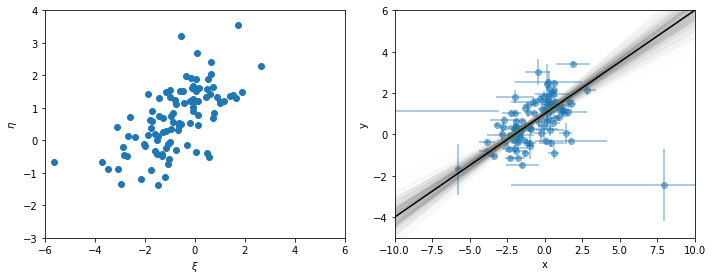

In [9]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax.scatter(xi, eta)
ax.set_xlabel(r'$\xi$')
ax.set_ylabel(r'$\eta$')
ax.set_xlim(-6,6)
ax.set_ylim(-3,4)


ax = fig.add_subplot(122)
ax.scatter(x, y, alpha=0.5)
ax.errorbar(x, y, xerr=xsig, yerr=ysig, ls=' ', alpha=0.5)
for i in range(0, len(lm.chain), 25):
    xs = np.arange(-10,11)
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    ax.plot(xs, ys, color='grey', alpha=0.02)
ys = alpha + xs * beta
ax.plot(xs, ys, color='k')
ax.set_xlabel(r'x')
ax.set_ylabel(r'y')
ax.set_xlim(-10,10)
ax.set_ylim(-5,6)
#ax.plot([-6,6,6,-6,-6], [-3,-3,4,4,-3], color='k')
fig.tight_layout()
plt.show()

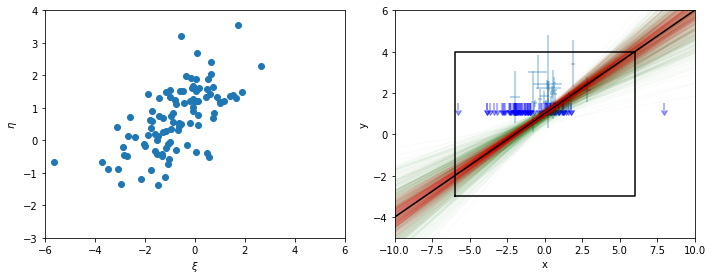

In [10]:
delta = y > 1.5
notdelta = np.logical_not(delta)
ycens = y.copy()
ycens[notdelta] = 1.5
lmcens  = linmix.LinMix(x, ycens, xsig, ysig, delta=delta, K=2)
lmcens.run_mcmc(silent=True)
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
ax.scatter(xi, eta)
ax.set_xlabel(r'$\xi$')
ax.set_ylabel(r'$\eta$')
ax.set_xlim(-6,6)
ax.set_ylim(-3,4)
ax = fig.add_subplot(122)
ax.errorbar(x[delta], ycens[delta], xsig[delta], ysig[delta], ls=' ', alpha=0.4)
ax.errorbar(x[notdelta], ycens[notdelta], yerr=0.3, uplims=np.ones(sum(notdelta), dtype=bool), ls=' ', c='b', alpha=0.4)
for i in range(0, len(lmcens.chain), 25):
    xs = np.arange(-10, 11)
    ys = lmcens.chain[i]['alpha'] + xs * lmcens.chain[i]['beta']
    ax.plot(xs, ys, color='g', alpha=0.02)
for i in range(0, len(lm.chain), 25):
    xs = np.arange(-10, 11)
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    ax.plot(xs, ys, color='r', alpha=0.02)
ys = alpha + xs * beta
ax.plot(xs, ys, color='k')
ax.set_xlabel(r'x')
ax.set_ylabel(r'y')
ax.set_xlim(-10,10)
ax.set_ylim(-5,6)
ax.plot([-6,6,6,-6,-6], [-3,-3,4,4,-3], color='k')
fig.tight_layout()
plt.savefig("cens_results.png")
plt.show()

!pip install "linmix @ git+https://github.com/jmeyers314/linmix.git"

import sys
!{sys.executable} -m pip install "linmix @ git+https://github.com/jmeyers314/linmix.git"

import linmix

In [11]:
lm = linmix.LinMix(x, y, xsig=xsig, ysig=ysig, #xycov=xycov, 
                   delta=delta, K=2, nchains=2)
#lm.run_mcmc(miniter=miniter, maxiter=maxiter, silent=silent)
lm.run_mcmc(silent=True)
print("{}, {}".format(lm.chain['alpha'].mean(), lm.chain['alpha'].std()))
print("{}, {}".format(lm.chain['beta'].mean(), lm.chain['beta'].std()))
print("{}, {}".format(lm.chain['sigsqr'].mean(), lm.chain['sigsqr'].std()))

-0.9005941017487323, 0.35602250950150444
1.6703623317001628, 0.3692881571658393
3.990644797288749, 1.2365352498570543


In [12]:
x,y

(array([-1.49234031e+00, -1.81920778e+00,  1.31689306e-01,  7.94926899e+00,
         3.62884070e-01,  4.38674475e-02,  9.04303177e-01, -2.03454265e+00,
        -3.85467578e+00,  2.52664203e-01, -2.77906356e+00,  1.13092744e+00,
         6.65431577e-01, -3.61144428e+00, -4.62137129e-01, -9.49349206e-01,
        -2.64388422e-02,  8.98230413e-02, -5.74738473e+00, -9.43190541e-01,
         6.65713000e-02,  2.38821317e-01,  5.13298686e-01,  3.81191417e-01,
         4.55709604e-01, -2.63978474e+00, -1.97248727e+00,  3.84575053e-01,
         1.60400447e+00,  6.60662123e-01, -1.79336421e+00, -1.27809332e+00,
         2.27047203e-01, -2.12120817e+00, -6.78260431e-01, -1.87022515e-02,
        -3.75925380e-01, -1.63424339e+00, -1.35531254e+00, -2.55347595e+01,
        -1.56266868e+00, -6.08645309e-01,  1.23299830e+00, -1.41730776e-01,
         5.68122857e-01,  4.44782651e-01, -7.69320047e-01,  1.79042757e-01,
         9.66515349e-01, -9.76579957e-01, -1.65697708e+00, -1.23884390e+00,
        -1.1

# pymc3

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from pymc3 import summary, traceplot
import pymc3 as pm
from pymc3_models.models.LinearRegression import LinearRegression

%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 10)

plt.rcParams['font.size'] = 16

ModuleNotFoundError: No module named 'pymc3'

In [ ]:
X = np.random.randn(1000, 1)
noise = 2 * np.random.randn(1000, 1)
Y = 4 * X + 3 + noise
Y = np.squeeze(Y)

In [ ]:
plt.scatter(X, Y)

In [ ]:
LR = LinearRegression()

In [ ]:
LR.fit(X, Y, minibatch_size=100)

In [ ]:
LR.plot_elbo()

# Inline Bayesian Linear Regression

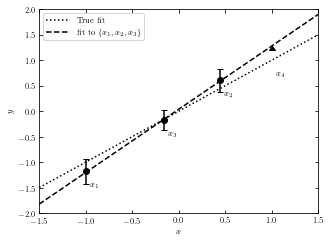

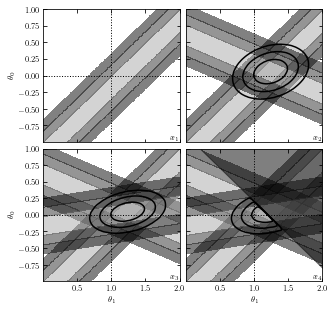

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.plotting.mcmc import convert_to_stdev

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Set up the data and errors
np.random.seed(13)
a = 1
b = 0

x = np.array([-1, 0.44, -0.16])
y = a * x + b
dy = np.array([0.25, 0.22, 0.2])

y = np.random.normal(y, dy)

# add a fourth point which is a lower bound
x4 = 1.0
y4 = a * x4 + b + 0.2

#------------------------------------------------------------
# Compute the likelihoods for each point
a_range = np.linspace(0, 2, 80)
b_range = np.linspace(-1, 1, 80)
logL = -((a_range[:, None, None] * x + b_range[None, :, None] - y) / dy) ** 2
sigma = [convert_to_stdev(logL[:, :, i]) for i in range(3)]

# compute best-fit from first three points
logL_together = logL.sum(-1)
i, j = np.where(logL_together == np.max(logL_together))
amax = a_range[i[0]]
bmax = b_range[j[0]]

#------------------------------------------------------------
# Plot the first figure: the points and errorbars
fig1 = plt.figure(figsize=(5, 3.75))
ax1 = fig1.add_subplot(111)

# Draw the true and best-fit lines
xfit = np.array([-1.5, 1.5])
ax1.plot(xfit, a * xfit + b, ':k', label='True fit')
ax1.plot(xfit, amax * xfit + bmax, '--k', label='fit to $\{x_1, x_2, x_3\}$')

ax1.legend(loc=2)

ax1.errorbar(x, y, dy, fmt='ok')
ax1.errorbar([x4], [y4], [[0.5], [0]], fmt='_k', lolims=True)

for i in range(3):
    ax1.text(x[i] + 0.05, y[i] - 0.3, "$x_{%i}$" % (i + 1))
ax1.text(x4 + 0.05, y4 - 0.5, "$x_4$")

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-2, 2)

#------------------------------------------------------------
# Plot the second figure: likelihoods for each point
fig2 = plt.figure(figsize=(5, 5))
fig2.subplots_adjust(hspace=0.05, wspace=0.05)

# plot likelihood contours
for i in range(4):
    ax = fig2.add_subplot(221 + i)
    for j in range(min(i + 1, 3)):
        ax.contourf(a_range, b_range, sigma[j].T,
                    levels=(0, 0.683, 0.955, 0.997),
                    cmap=plt.cm.binary, alpha=0.5)

# plot the excluded area from the fourth point
axpb = a_range[:, None] * x4 + b_range[None, :]
mask = y4 < axpb
fig2.axes[3].fill_between(a_range, y4 - x4 * a_range, 2, color='k', alpha=0.5)

# plot ellipses
for i in range(1, 4):
    ax = fig2.axes[i]
    logL_together = logL[:, :, :i + 1].sum(-1)
    if i == 3:
        logL_together[mask] = -np.inf

    sigma_together = convert_to_stdev(logL_together)

    ax.contour(a_range, b_range, sigma_together.T,
               levels=(0.683, 0.955, 0.997),
               colors='k')

# Label and adjust axes
for i in range(4):
    ax = fig2.axes[i]

    ax.text(1.98, -0.98, "$x_{%i}$" % (i + 1), ha='right', va='bottom')

    ax.plot([0, 2], [0, 0], ':k', lw=1)
    ax.plot([1, 1], [-1, 1], ':k', lw=1)

    ax.set_xlim(0.001, 2)
    ax.set_ylim(-0.999, 1)

    if i in (1, 3):
        ax.yaxis.set_major_formatter(plt.NullFormatter())
    if i in (0, 1):
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    if i in (0, 2):
        ax.set_ylabel(r'$\theta_0$')
    if i in (2, 3):
        ax.set_xlabel(r'$\theta_1$')


plt.show()

# Perform Outlier Rejection with MCMC

In [1]:
import numpy as np

import pymc3 as pm

from matplotlib import pyplot as plt
from theano import shared as tshared
import theano.tensor as tt

from astroML.datasets import fetch_hogg2010test
from astroML.plotting.mcmc import convert_to_stdev


# ----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

np.random.seed(0)

# ------------------------------------------------------------
# Get data: this includes outliers. We need to convert them to Theano variables
data = fetch_hogg2010test()
xi = tshared(data['x'])
yi = tshared(data['y'])
dyi = tshared(data['sigma_y'])
size = len(data)


# ----------------------------------------------------------------------
# Define basic linear model

def model(xi, theta, intercept):
    slope = np.tan(theta)
    return slope * xi + intercept


# ----------------------------------------------------------------------
# First model: no outlier correction
with pm.Model():
    # set priors on model gradient and y-intercept
    inter = pm.Uniform('inter', -1000, 1000)
    theta = pm.Uniform('theta', -np.pi / 2, np.pi / 2)

    y = pm.Normal('y', mu=model(xi, theta, inter), sd=dyi, observed=yi)

    trace0 = pm.sample(draws=5000, tune=1000)


# ----------------------------------------------------------------------
# Second model: nuisance variables correcting for outliers
# This is the mixture model given in equation 17 in Hogg et al
def mixture_likelihood(yi, xi):
    """Equation 17 of Hogg 2010"""

    sigmab = tt.exp(log_sigmab)
    mu = model(xi, theta, inter)

    Vi = dyi ** 2
    Vb = sigmab ** 2

    root2pi = np.sqrt(2 * np.pi)

    L_in = (1. / root2pi / dyi * np.exp(-0.5 * (yi - mu) ** 2 / Vi))

    L_out = (1. / root2pi / np.sqrt(Vi + Vb)
             * np.exp(-0.5 * (yi - Yb) ** 2 / (Vi + Vb)))

    return tt.sum(tt.log((1 - Pb) * L_in + Pb * L_out))


with pm.Model():
    # uniform prior on Pb, the fraction of bad points
    Pb = pm.Uniform('Pb', 0, 1.0, testval=0.1)

    # uniform prior on Yb, the centroid of the outlier distribution
    Yb = pm.Uniform('Yb', -10000, 10000, testval=0)

    # uniform prior on log(sigmab), the spread of the outlier distribution
    log_sigmab = pm.Uniform('log_sigmab', -10, 10, testval=5)

    inter = pm.Uniform('inter', -200, 400)
    theta = pm.Uniform('theta', -np.pi / 2, np.pi / 2, testval=np.pi / 4)

    y_mixture = pm.DensityDist('mixturenormal', logp=mixture_likelihood,
                               observed={'yi': yi, 'xi': xi})

    trace1 = pm.sample(draws=5000, tune=1000)


# ----------------------------------------------------------------------
# Third model: marginalizes over the probability that each point is an outlier.
# define priors on beta = (slope, intercept)

def outlier_likelihood(yi, xi):
    """likelihood for full outlier posterior"""

    sigmab = tt.exp(log_sigmab)
    mu = model(xi, theta, inter)

    Vi = dyi ** 2
    Vb = sigmab ** 2

    logL_in = -0.5 * tt.sum(qi * (np.log(2 * np.pi * Vi)
                                  + (yi - mu) ** 2 / Vi))

    logL_out = -0.5 * tt.sum((1 - qi) * (np.log(2 * np.pi * (Vi + Vb))
                                         + (yi - Yb) ** 2 / (Vi + Vb)))

    return logL_out + logL_in


with pm.Model():
    # uniform prior on Pb, the fraction of bad points
    Pb = pm.Uniform('Pb', 0, 1.0, testval=0.1)

    # uniform prior on Yb, the centroid of the outlier distribution
    Yb = pm.Uniform('Yb', -10000, 10000, testval=0)

    # uniform prior on log(sigmab), the spread of the outlier distribution
    log_sigmab = pm.Uniform('log_sigmab', -10, 10, testval=5)

    inter = pm.Uniform('inter', -1000, 1000)
    theta = pm.Uniform('theta', -np.pi / 2, np.pi / 2)

    # qi is bernoulli distributed
    qi = pm.Bernoulli('qi', p=1 - Pb, shape=size)

    y_outlier = pm.DensityDist('outliernormal', logp=outlier_likelihood,
                               observed={'yi': yi, 'xi': xi})

    trace2 = pm.sample(draws=5000, tune=1000)


# ------------------------------------------------------------
# plot the data
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.25,
                    bottom=0.1, top=0.95, hspace=0.2)

# first axes: plot the data
ax1 = fig.add_subplot(221)
ax1.errorbar(data['x'], data['y'], data['sigma_y'], fmt='.k', ecolor='gray', lw=1)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

#------------------------------------------------------------
# Go through models; compute and plot likelihoods
linestyles = [':', '--', '-']
labels = ['no outlier correction\n(dotted fit)',
          'mixture model\n(dashed fit)',
          'outlier rejection\n(solid fit)']

x = np.linspace(0, 350, 10)

bins = [(np.linspace(140, 300, 51), np.linspace(0.6, 1.6, 51)),
        (np.linspace(-40, 120, 51), np.linspace(1.8, 2.8, 51)),
        (np.linspace(-40, 120, 51), np.linspace(1.8, 2.8, 51))]

for i, trace in enumerate([trace0, trace1, trace2]):
    H2D, bins1, bins2 = np.histogram2d(np.tan(trace['theta']),
                                       trace['inter'], bins=50)
    w = np.where(H2D == H2D.max())

    # choose the maximum posterior slope and intercept
    slope_best = bins1[w[0][0]]
    intercept_best = bins2[w[1][0]]

    # plot the best-fit line
    ax1.plot(x, intercept_best + slope_best * x, linestyles[i], c='k')

    # For the model which identifies bad points,
    # plot circles around points identified as outliers.
    if i == 2:
        Pi = trace['qi'].mean(0)
        outlier_x = data['x'][Pi < 0.32]
        outlier_y = data['y'][Pi < 0.32]
        ax1.scatter(outlier_x, outlier_y, lw=1, s=400, alpha=0.5,
                    facecolors='none', edgecolors='red')

    # plot the likelihood contours
    ax = plt.subplot(222 + i)

    H, xbins, ybins = np.histogram2d(trace['inter'],
                                     np.tan(trace['theta']), bins=bins[i])
    H[H == 0] = 1E-16
    Nsigma = convert_to_stdev(np.log(H))

    ax.contour(0.5 * (xbins[1:] + xbins[:-1]),
               0.5 * (ybins[1:] + ybins[:-1]),
               Nsigma.T, levels=[0.683, 0.955], colors='black')

    ax.set_xlabel('intercept')
    ax.set_ylabel('slope')
    ax.grid(color='gray')
    ax.xaxis.set_major_locator(plt.MultipleLocator(40))
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))

    ax.text(0.96, 0.96, labels[i], ha='right', va='top',
            bbox=dict(fc='w', ec='none', alpha=0.5),
            transform=ax.transAxes)
    ax.set_xlim(bins[i][0][0], bins[i][0][-1])
    ax.set_ylim(bins[i][1][0], bins[i][1][-1])

ax1.set_xlim(0, 350)
ax1.set_ylim(100, 700)

plt.show()

ModuleNotFoundError: No module named 'pymc3'

# symfit

In [13]:
from symfit import parameters, variables, Fit, Model
import numpy as np

xdata = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
ydata = np.array([2.3, 3.3, 4.1, 5.5, 6.7])
yerr = np.array([0.1, 0.1, 0.1, 0.1, 0.1])

a, b = parameters('a, b')
x, y = variables('x, y')
model = Model({y: a * x + b})

fit = Fit(model, x=xdata, y=ydata, sigma_y=yerr)
fit_result = fit.execute()

ModuleNotFoundError: No module named 'symfit'

In [4]:
from symfit import parameters, variables, Fit
import numpy as np

# Define a model to fit to.
a, b = parameters('a, b')
x = variables('x')
model = a * x + b

# Generate some data
xdata = np.linspace(0, 100, 100)  # From 0 to 100 in 100 steps
a_vec = np.random.normal(15.0, scale=2.0, size=(100,))
b_vec = np.random.normal(100.0, scale=2.0, size=(100,))
# Point scattered around the line 5 * x + 105
ydata = a_vec * xdata + b_vec

fit = Fit(model, xdata, ydata)
fit_result = fit.execute()

ModuleNotFoundError: No module named 'symfit'